In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

# Cosumo de cerveja

<p style='font-size: 15px; line-height: 2; margin: 5px 5px; text-align: justify;'> O dataset foi retirado do site kaggle e comporta os dados de consumo de cerveja durante o espaço de um ano (2015).</p>

In [3]:
dados = pd.read_csv('Consumo_cerveja.csv', sep=';')
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


## Dados da análise

<p style='font-size: 15px; line-height: 2; margin: 5px 5px; text-align: justify;'>As colunas da base de dados segue o seguinte descritivo</p>
<ul style='font-size: 15px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - É a data de quando foram coletados os dados</li>
    <li><b>temp_media</b> - Temperatura média do dia coletado em graus Celsius</li>
    <li><b>temp_min</b> - Temperatura miníma do dia coletado em graus Celsius</li>
    <li><b>temp_max</b> - Temperatura máxima do dia coletado em graus Celsius</li>
    <li><b>chuva</b> - Informa o quanto em mm choveu no dia da coleta</li>
    <li><b>fds</b> - Indica se é dia de semana (0) ou se é fim de semana (1)</li>
    <li><b>cosumo</b> - O consumo total de cerveja no dia da coleta</li>
</ul>

In [4]:
print('A base de dados possui {} linhas e {} colunas.'.format(dados.shape[0],dados.shape[1]))

A base de dados possui 365 linhas e 7 colunas.


## Análise descritiva
<p style='font-size: 15px; line-height: 2; margin: 5px 5px; text-align: justify;'> Abaixo vamos realizar uma análise descritiva dos dados para entender melhor as informações.</p>

In [5]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


# Análise gráfica

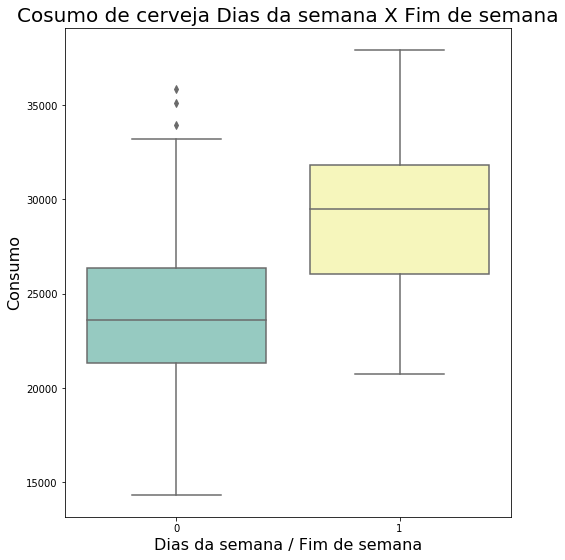

In [6]:
ax = sns.boxplot(y=dados['consumo'], x=dados['fds'], orient='v',palette = 'Set3')
ax.figure.set_size_inches(8,9)
ax.set_title('Cosumo de cerveja Dias da semana X Fim de semana', fontsize = 20)
ax.set_ylabel('Consumo', fontsize=16)
ax.set_xlabel('Dias da semana / Fim de semana', fontsize=16)
ax
ax

<p style='font-size: 16px; line-height: 2; margin: 5px 5px; text-align: justify;'> Com o gráfico acima podemos validar que o consumo de cerveja é muito maior durante o fim de semana do que durante a semana.</p>

<ul style='font-size: 16px'>
    <li><b>0</b> - Dias da semana</li>
    <li><b>1</b> - Fim de semana</li>
</ul>

# Analisando o consumo por mês
<p style='font-size: 16px; line-height: 2; margin: 5px 5px; text-align: justify;'> Agora iremos analisar o consumo de cerveja por mês, porém primeiro teremos que criar uma nova coluna para pegar apenas os meses da coluna data</p>

In [7]:
dados.dtypes

data           object
temp_media    float64
temp_min      float64
temp_max      float64
chuva         float64
fds             int64
consumo         int64
dtype: object

In [8]:
dados['data'] = pd.to_datetime(dados['data'])

In [9]:
dados.dtypes

data          datetime64[ns]
temp_media           float64
temp_min             float64
temp_max             float64
chuva                float64
fds                    int64
consumo                int64
dtype: object

In [10]:
dados['Mês'] = dados['data'].dt.month

In [11]:
dados = dados.sort_values('data').reset_index(drop=True)

In [12]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo,Mês
0,2015-01-01,27.30,23.9,32.5,0.0,0,25461,1
1,2015-01-02,24.16,20.6,28.0,0.0,1,32057,1
2,2015-01-03,21.26,18.2,26.3,3.0,1,27475,1
3,2015-01-04,22.52,19.2,27.5,0.0,0,21979,1
4,2015-01-05,17.34,13.4,22.0,0.0,0,17939,1


<p style='font-size: 16px; line-height: 2; margin: 5px 5px; text-align: justify;'> Com a coluna de mês criada agora podemos analisar o consumo mensal</p>

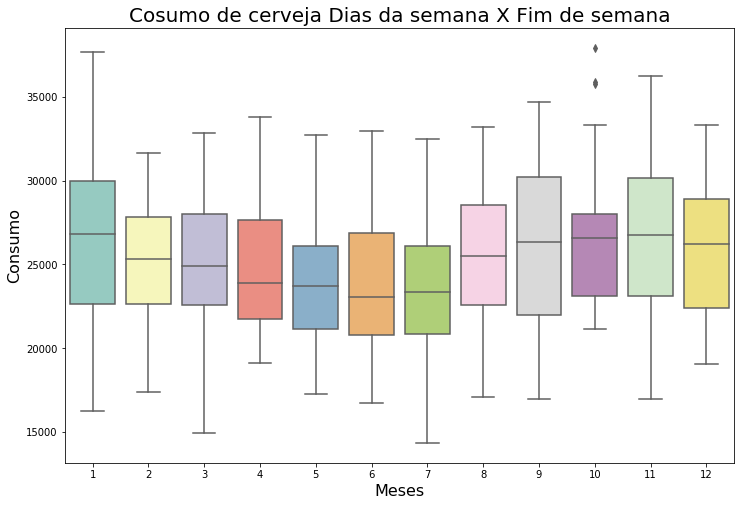

In [13]:
ax = sns.boxplot(y=dados['consumo'], x=dados['Mês'], orient='v',palette = 'Set3')
ax.figure.set_size_inches(12,8)
ax.set_title('Cosumo de cerveja Dias da semana X Fim de semana', fontsize = 20)
ax.set_ylabel('Consumo', fontsize=16)
ax.set_xlabel('Meses', fontsize=16)
ax

<ul style='font-size: 16px'>
    <li><b>1</b> - Janeiro</li>
    <li><b>2</b> - Fevereiro</li>
    <li><b>3</b> - Março</li>
    <li><b>4</b> - Abril</li>
    <li><b>5</b> - Maio</li>
    <li><b>6</b> - Junho</li>
    <li><b>7</b> - Julho</li>
    <li><b>8</b> - Agosto</li>
    <li><b>9</b> - Setembro</li>
    <li><b>10</b> - Outubro</li>
    <li><b>11</b> - Novembro</li>
    <li><b>12</b> - Dezembro</li>
</ul>

<p style='font-size: 16px; line-height: 2; margin: 5px 5px; text-align: justify;'> Podemos também conferir o resultado de consumo nos meses por semana e fim de semana</p>

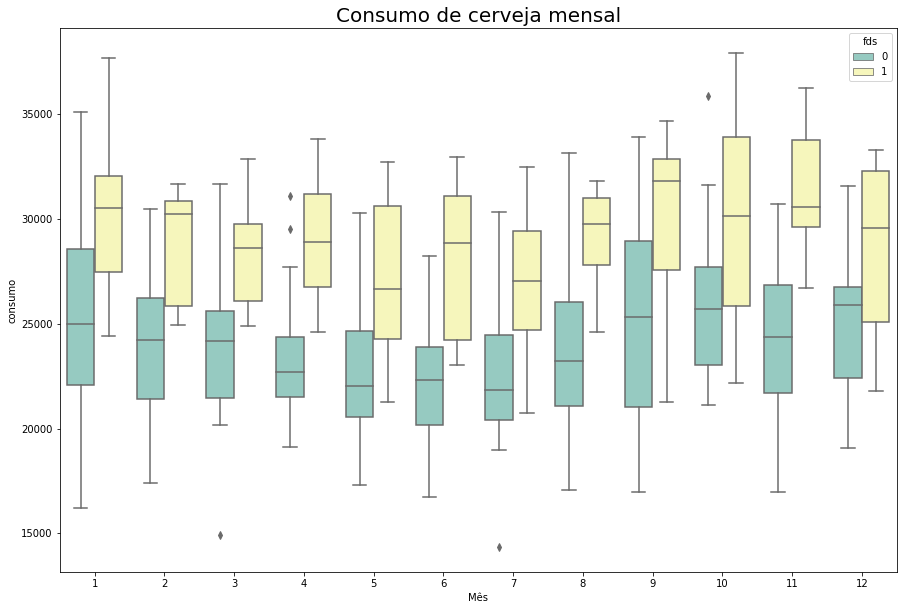

In [14]:
ax = sns.boxplot(y=dados['consumo'], x=dados['Mês'], hue=dados['fds'], orient='v',palette='Set3')
ax.figure.set_size_inches(15,10)
ax.set_title('Consumo de cerveja mensal', fontsize=20)
ax

# CONCLUSÃO

<p style='font-size: 16px; line-height: 2; margin: 5px 5px; text-align: justify;'> Agora que já temos visualmente o consumo por mês e por dias de semana ou fim de semana, podemos entender como o consumo mensal se comporta conforme a temperatura máxima</p>
<p style='font-size: 16px; line-height: 2; margin: 5px 5px; text-align: justify;'> Vamos ver como a temperatura se comporta nos meses</p>

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


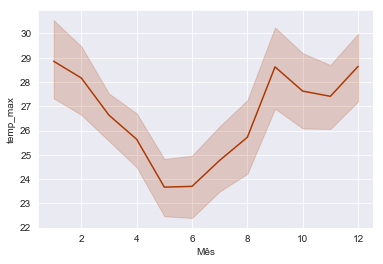

In [15]:
sns.set_palette('Oranges_r')
sns.set_style('darkgrid')
sns.lineplot(y='temp_max', x='Mês', data=dados)

# Analisando a variável dependente "Consumo" pelo dataset inteiro

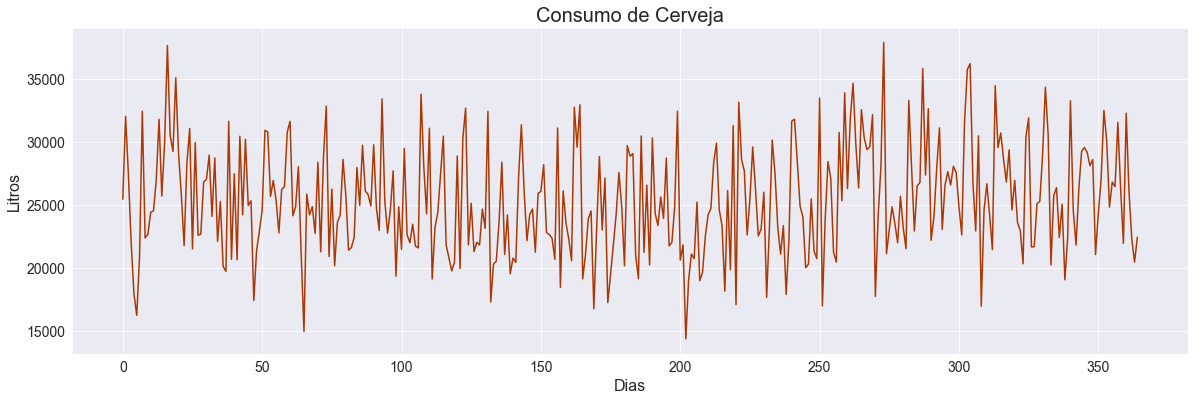

In [16]:
fig, ax = plt.subplots(figsize=(20,6))
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

# Analisando a distribuição de frequência

<p style='font-size: 16px; line-height: 2; margin: 5px 5px; text-align: justify;'> Por fim, vamos analisar a distribuição de frequência da variável dependente, como será estimado um modelo de regressão linear precisamos que essa distribuição seja normal.</p>

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribuição de frequência')

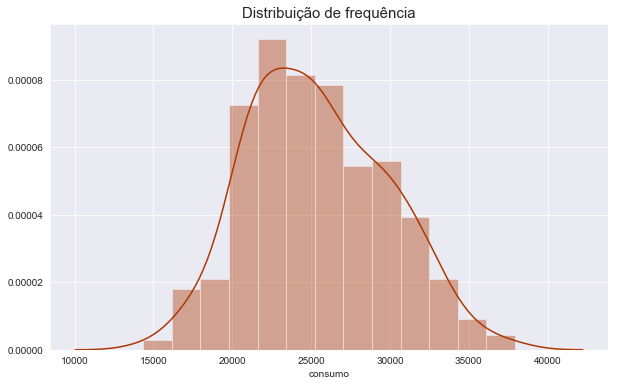

In [17]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de frequência', fontsize=15)

<p style='font-size: 16px; line-height: 2; margin: 5px 5px; text-align: justify;'> Mesmo tendo uma pequena deformação podemos considerar que é uma distribuição normal.</p>

# Analisando a relação linear
<p style='font-size: 16px; line-height: 2; margin: 5px 5px; text-align: justify;'> Abaixo iremos avaliar a relação linear da variável dependente com as variáveis explicativas</p>

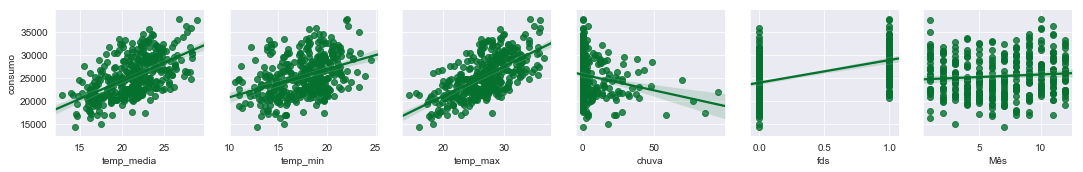

In [18]:
sns.set_palette('Greens_r')
ax = sns.pairplot(dados, 
                  y_vars ='consumo', 
                  x_vars=['temp_media','temp_min','temp_max', 'chuva','fds','Mês'], 
                  kind='reg')

# Separando o modelo em treino e teste

In [35]:
y = dados['consumo']
X = dados[['temp_media','temp_min','temp_max', 'chuva','fds','Mês']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2811)

# Stats Model
<p style='font-size: 16px; line-height: 2; margin: 5px 5px; text-align: justify;'> Agora iremos usar o OLS da biblioteca statsmodel para validaro nosso modelo e testas nossas variáveis explicativas</p>

In [37]:
X_train_constante = sm.add_constant(X_train)
X_train_constante.head()

,const,temp_media,temp_min,temp_max,chuva,fds,Mês
316,1.0,22.78,19.4,29.6,0.0,0,11
70,1.0,22.44,20.2,26.1,0.0,0,3
214,1.0,22.20,19.7,24.4,69.2,1,8
297,1.0,17.64,15.7,19.2,0.0,1,10
92,1.0,23.68,18.9,30.5,0.0,0,4


In [38]:
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

In [39]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     138.3
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           2.22e-81
Time:                        11:46:34   Log-Likelihood:                -2665.6
No. Observations:                 292   AIC:                             5345.
Df Residuals:                     285   BIC:                             5371.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5376.7002    945.545      5.686      0.0

<p style='font-size: 16px; line-height: 2; margin: 5px 5px; text-align: justify;'> Acima podemos validar que o nosso R-squared está dentro de 74% o que entrega um resultado razoável para um modelo de estudo como esse.</p>
<p style='font-size: 16px; line-height: 2; margin: 5px 5px; text-align: justify;'> Já as váriáveis tem_media e tme_min possuem um P>|t| muito alto, acima de 0.05 que é um valor recomendado que indica a relação explicativa entre a variável dependente e a de consumo, então abaixo será refeito o modelo sem tais variáveis</p>

In [40]:
y = dados['consumo']
X = dados[['temp_max', 'chuva','fds','Mês']]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2811)

In [42]:
X_train_constante = sm.add_constant(X_train)
X_train_constante.head()

,const,temp_max,chuva,fds,Mês
316,1.0,29.6,0.0,0,11
70,1.0,26.1,0.0,0,3
214,1.0,24.4,69.2,1,8
297,1.0,19.2,0.0,1,10
92,1.0,30.5,0.0,0,4


In [43]:
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

In [44]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     208.4
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           1.39e-83
Time:                        11:47:45   Log-Likelihood:                -2665.8
No. Observations:                 292   AIC:                             5342.
Df Residuals:                     287   BIC:                             5360.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5247.6006    862.800      6.082      0.0

# Regressão linear
<p style='font-size: 16px; line-height: 2; margin: 5px 5px; text-align: justify;'> Com modelo já validado com o statsmodel, vamos estimar com a regressão linear para predizer alguns valores</p>

In [46]:
modelo = LinearRegression()

In [47]:
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.744


In [49]:
y_previsto = modelo.predict(X_test)

In [50]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² = 0.642


<p style='font-size: 16px; line-height: 2; margin: 5px 5px; text-align: justify;'> Abaixo estão os valores utilizados para testar o valor previsto para o mês</p>

In [55]:
temp_max = 33
chuva = 0
fds = 1
Mes = 7
entrada = [[temp_max,chuva,fds,Mes]]
print('O Consumo é de: {0:.2f} litros'.format(modelo.predict(entrada)[0]))

O Consumo é de: 33920.57 litros
